Assignment 5 \
Part 1: Brain Cancer Binary Classification \
Submitted by Group 5 \

Groupmembers:

1. Sajan Kumer Sarker (2111131642) (sajan.sarker@northsouth.edu)
2. Rafsan Jani Chowdhury (2011424642) (rafsan.chowdhury@northsouth.edu)
3. Rosely Mohammad (2014219642) (rosely.mohammad@northsouth.edu)

Algorithm: \
1. ZeroR classifier
2. OneR classifier
3. K-Nearest-Neighbor Classifiers
4. Naive Bayesian Classifier
5. Support vector machine (SVM)



**For Binary Classification problem: Accuracy, Confusion matrix, Precision, Recall, F-score, and Precision-Recall curve**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import math
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from collections import defaultdict

In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE445-Assignment/dataset/DT-BrainCancer.csv')
print(df.shape)
print(df.head())

(88, 7)
   Unnamed: 0     sex   diagnosis             loc  ki    gtv  status
0           1  Female  Meningioma  Infratentorial  90   6.11       0
1           2    Male   HG glioma  Supratentorial  90  19.35       1
2           3  Female  Meningioma  Infratentorial  70   7.95       0
3           4  Female   LG glioma  Supratentorial  80   7.61       1
4           5    Male   HG glioma  Supratentorial  90   5.06       1


In [4]:
print('Number of missing values: ')
print(df.isnull().sum())

Number of missing values: 
Unnamed: 0    0
sex           0
diagnosis     1
loc           0
ki            0
gtv           0
status        0
dtype: int64


In [5]:
df = df.drop(columns=['Unnamed: 0', 'sex'])
df = df.dropna()
print(df.shape)
print(df.head())

(87, 5)
    diagnosis             loc  ki    gtv  status
0  Meningioma  Infratentorial  90   6.11       0
1   HG glioma  Supratentorial  90  19.35       1
2  Meningioma  Infratentorial  70   7.95       0
3   LG glioma  Supratentorial  80   7.61       1
4   HG glioma  Supratentorial  90   5.06       1


In [6]:
le = LabelEncoder()
df['diagnosis'] = le.fit_transform(df['diagnosis'])
df['loc'] = le.fit_transform(df['loc'])
print(df.head(), df.tail())

   diagnosis  loc  ki    gtv  status
0          2    0  90   6.11       0
1          0    1  90  19.35       1
2          2    0  70   7.95       0
3          1    1  80   7.61       1
4          0    1  90   5.06       1     diagnosis  loc  ki    gtv  status
83          0    1  80   0.16       1
84          0    1  80  19.81       1
85          2    1  90   2.50       0
86          2    1  90   2.02       0
87          3    0  80   0.11       0


In [7]:
X = df.drop(columns=['status'])
y = df['status']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# this will used after cross-validation
X_train_val = np.concatenate((X_train, X_val))
y_train_val = np.concatenate((y_train, y_val))

print(f'Train Data Shape (X, y): {X_train.shape, y_train.shape}')
print(f'Validation Data Shape (X, y): {X_val.shape, y_val.shape}')
print(f'Test Data Shape (X, y): {X_test.shape, y_test.shape}')

Train Data Shape (X, y): ((60, 4), (60,))
Validation Data Shape (X, y): ((13, 4), (13,))
Test Data Shape (X, y): ((14, 4), (14,))


In [8]:
# functions to calculate: accuracy, average precision, average recall, average f-score.

# Accuracy
def accuracy_score(y_actual, y_predict):
  correct = 0
  total_samples = len(y_actual)

  for predict, actual in zip(y_predict, y_actual):
    if predict == actual:
      correct += 1

  return (correct/ total_samples)

# Precision
def precision_score(y_actual, y_predict):
  precision_scores = []

  for class_label in set(y_actual):
    true_positive = 0
    false_positive = 0

    for actual, predict in zip(y_actual, y_predict):
      if predict == class_label:
        if actual == class_label:
          true_positive += 1
        else:
          false_positive += 1

    if true_positive+false_positive ==0:
      class_precision = 0.0
    else:
      class_precision = true_positive / (true_positive + false_positive)
    precision_scores.append(class_precision)
  return precision_scores

# average precision
def average_precision_score_macro(precision_score, y_actual):
  return sum(precision_score)/len(set(y_actual))

# recall
def recall_score(y_actual, y_predict):
  recall_scores = []

  for class_label in set(y_actual):
    true_positive = 0
    false_negative = 0

    for actual, predict in zip(y_actual, y_predict):
      if actual == class_label:
        if predict == class_label:
          true_positive += 1
        else:
          false_negative += 1

    if true_positive+false_negative ==0:
      class_recall = 0.0
    else:
      class_recall = true_positive / (true_positive + false_negative)

    recall_scores.append(class_recall)
  return recall_scores

# average recall
def average_recall_score_macro(recall_score, y_actual):
  return sum(recall_score)/len(set(y_actual))

# f-score
def fscore(y_actual,y_predict):
  f_score_total = []

  for class_label in set(y_actual):
    true_positive = 0
    false_positive = 0
    false_negative = 0

    for actual, predict in zip(y_actual, y_predict):
      if predict == class_label:
        if actual == class_label:
          true_positive += 1
        else:
          false_positive += 1
      elif actual == class_label:
        false_negative += 1

    if true_positive + false_positive == 0:
      precision = 0.0
    else:
      precision = true_positive/(true_positive+false_positive)

    if true_positive + false_negative == 0:
      precision = 0.0
    else:
      recall = true_positive/(true_positive+false_negative)

    if precision + recall ==0:
      f_score = 0.0
    else:
      f_score = 2*true_positive/((2*true_positive)+false_positive+false_negative)

    f_score_total.append(f_score)
  return f_score_total

# fscore average
def fscore_average_macro(fscore, y_actual):
  return sum(fscore)/len(set(y_actual))

# display confusion matrix
def display_confusion_matrix(y_test, y_predict):
  num_class = len(set(y_test))
  class_labels = list(set(y_test))

  plt.figure(figsize=(8, 6))

  conf_matrix = np.zeros((num_class, num_class), dtype=int)
  for actual, predict in zip(y_test, y_predict):
      conf_matrix[actual, predict] += 1

  plt.imshow(conf_matrix, cmap='Blues', interpolation='nearest')
  plt.title("Confusion Matrix", fontsize=16, fontweight='bold')
  plt.xlabel("Predicted Labels", fontsize=12)
  plt.ylabel("True Labels", fontsize=12)

  for i in range(num_class):
      for j in range(num_class):
          plt.text(j, i, str(conf_matrix[i, j]), ha='center', va='center', color='red', fontsize=12)

  plt.xticks(ticks=range(num_class), labels=class_labels, fontsize=10)
  plt.yticks(ticks=range(num_class), labels=class_labels, fontsize=10)
  plt.tight_layout()
  plt.show()


*****
# ZeroR Classifier

Majority Class: 0
ZeroR Baseline Accuracy: 59.77%


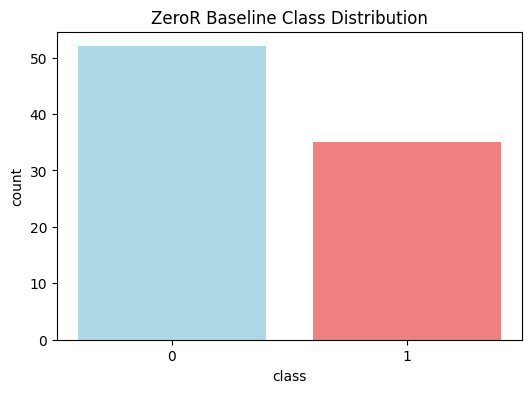

In [9]:
class_counts = y.value_counts()
majority_class = class_counts.idxmax()
majority_count = class_counts.max()

baseline_accuracy = majority_count/len(y) * 100   # calculate baseline accuracy

print(f"Majority Class: {majority_class}")
print(f"ZeroR Baseline Accuracy: {baseline_accuracy:.2f}%")

# plot data
plt.figure(figsize=(6, 4))
plt.title(f'ZeroR Baseline Class Distribution')
plt.bar(class_counts.index, class_counts.values, color=['lightblue', 'lightcoral'])
plt.xticks([0,1],['0','1'])
plt.xlabel('class')
plt.ylabel('count')
plt.show()

*****
# OneR Classifier

In [10]:
# OneR Classifier implementation
class OneRClassifier:
  def __init__(self):
    self.rule = None

  def fit(self, X, y):
    best_rule = None
    best_error = float('inf')

    for column in X.columns:
      freq_table = defaultdict(lambda: defaultdict(int))
      for value, label in zip(X[column], y):
        freq_table[value][label] += 1

      error_rate = sum(max(freq_table[value].values()) for value in freq_table)/len(y)

      if error_rate < best_error:
        best_rule = (column, freq_table)
        best_error = error_rate
    self.rule = best_rule

  def predict(self, X):
    if self.rule is None:
      raise Exception("Classifier has not been trained yet!")
    column, freq_table = self.rule

    predict = []
    for value in X[column]:
      predict.append(max(freq_table[value], key=freq_table[value].get))
    return predict

In [11]:
#oneR classifier initialize
oner = OneRClassifier()
oner.fit(X_train, y_train)

y_val_predict = oner.predict(X_val)
print("OneR validation set Accuracy:", accuracy_score(y_val, y_val_predict))

y_test_predict = oner.predict(X_test)
print("OneR test set Accuracy:", accuracy_score(y_test, y_test_predict))

OneR validation set Accuracy: 0.6923076923076923
OneR test set Accuracy: 0.6428571428571429


*****
# KNN, Naive Bayesian, SVM Classifiers Base Model

In [12]:
# Base model train and accuracy on validation dataset
knn_base = KNeighborsClassifier()
svc_base = SVC()
nb_base = GaussianNB()

knn_base.fit(X_train, y_train)
svc_base.fit(X_train, y_train)
nb_base.fit(X_train, y_train)

knn_pred_val = knn_base.predict(X_val)
svc_pred_val = svc_base.predict(X_val)
nb_pred_val = nb_base.predict(X_val)

print("KNN Accuracy:", accuracy_score(y_val, knn_pred_val))
print("SVM Accuracy:", accuracy_score(y_val, svc_pred_val))
print("Naive Bayes Accuracy:", accuracy_score(y_val, nb_pred_val))

KNN Accuracy: 0.7692307692307693
SVM Accuracy: 0.6923076923076923
Naive Bayes Accuracy: 0.7692307692307693


*****
#K-Nearest-Neighbor Classifiers CV

In [13]:
# initialize the classifier models
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn_grid = GridSearchCV(estimator=knn_classifier, param_grid=knn_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
knn_grid.fit(X_train, y_train)

knn_best_params = knn_grid.best_params_
print("Best KNN Parameters:", knn_best_params)

Best KNN Parameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}


In [14]:
knn_final_model = KNeighborsClassifier(**knn_best_params)
knn_final_model.fit(X_train, y_train)

knn_pred_val = knn_final_model.predict(X_val)
print("KNN Accuracy:", accuracy_score(y_val, knn_pred_val))

KNN Accuracy: 0.6923076923076923


KNN: 
Accuracy: 0.7857142857142857
Precision: [0.8, 0.75]
Recall: [0.8888888888888888, 0.6]
F1-Score: [0.8421052631578947, 0.6666666666666666]



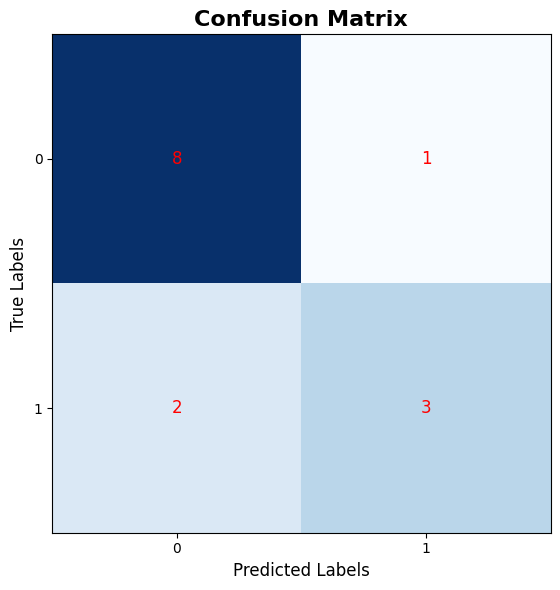

In [15]:
# retrain knn final model using train_val set and evaluate on test set
knn_final_model.fit(X_train_val, y_train_val)

y_test_pred_knn = knn_final_model.predict(X_test)

print("KNN: ")
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_knn)}')
print(f'Precision: {precision_score(y_test, y_test_pred_knn)}')
print(f'Recall: {recall_score(y_test, y_test_pred_knn)}')
print(f'F1-Score: {fscore(y_test, y_test_pred_knn)}')
print()

display_confusion_matrix(y_test, y_test_pred_knn)

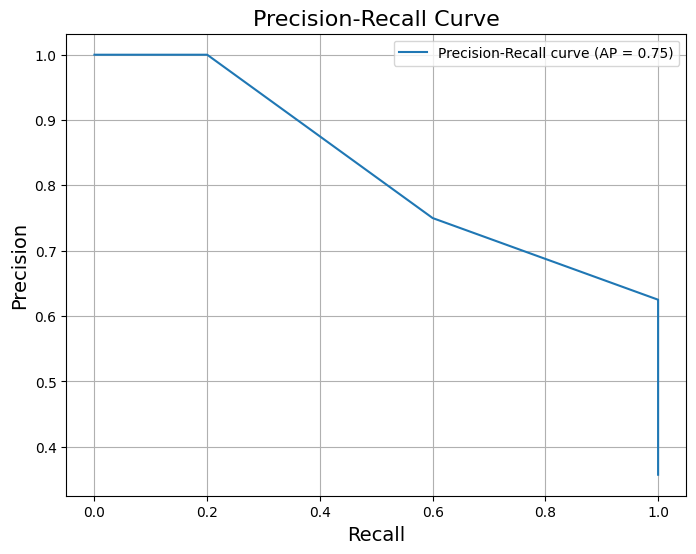

In [28]:
from sklearn.metrics import precision_recall_curve, average_precision_score
y_scores_knn = knn_final_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_knn)
average_precision = average_precision_score(y_test, y_scores_knn)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='best')
plt.grid()
plt.show()

*****
#Naive Bayesian Classifiers CV

In [16]:
# initialize the classifier models
nb_classifier = GaussianNB()

nb_param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

nb_grid = GridSearchCV(estimator=nb_classifier, param_grid=nb_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

nb_grid.fit(X_train, y_train)

nb_best_params = nb_grid.best_params_
print("Best KNN Parameters:", nb_best_params)

Best KNN Parameters: {'var_smoothing': 1e-09}


In [17]:
nb_final_model = GaussianNB(**nb_best_params)
nb_final_model.fit(X_train, y_train)

nb_pred_val = nb_final_model.predict(X_val)
print("Naive Bayesian Accuracy:", accuracy_score(y_val, nb_pred_val))

Naive Bayesian Accuracy: 0.7692307692307693


Naive Bayesian: 
Accuracy: 0.9285714285714286
Precision: [1.0, 0.8333333333333334]
Recall: [0.8888888888888888, 1.0]
F1-Score: [0.9411764705882353, 0.9090909090909091]



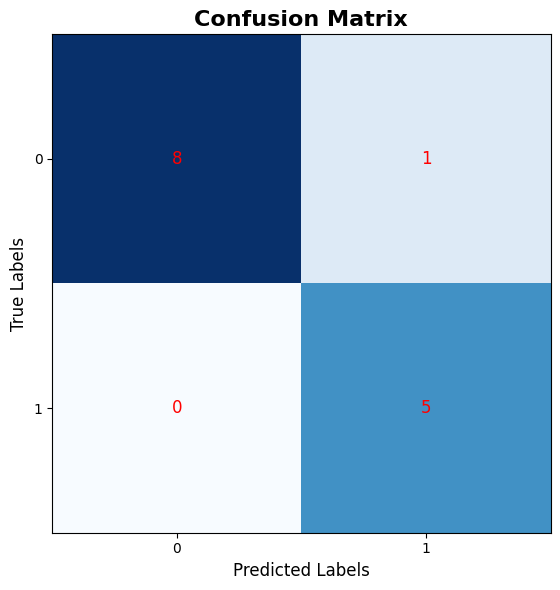

In [18]:
# retrain naive bayesian final model using train_val set and evaluate on test set
nb_final_model.fit(X_train_val, y_train_val)

y_test_pred_nb = nb_final_model.predict(X_test)

print("Naive Bayesian: ")
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_nb)}')
print(f'Precision: {precision_score(y_test, y_test_pred_nb)}')
print(f'Recall: {recall_score(y_test, y_test_pred_nb)}')
print(f'F1-Score: {fscore(y_test, y_test_pred_nb)}')
print()

display_confusion_matrix(y_test, y_test_pred_nb)

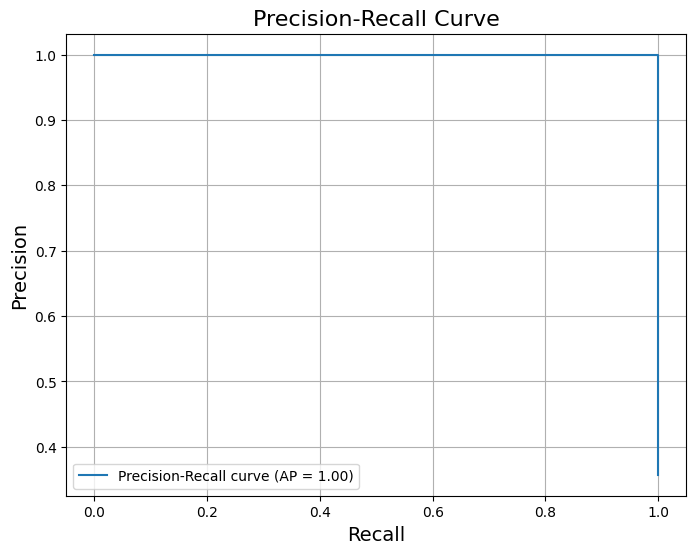

In [29]:
y_scores_nb = nb_final_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_nb)
average_precision = average_precision_score(y_test, y_scores_nb)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='best')
plt.grid()
plt.show()

*****
# SVM Classifiers CV

In [19]:
# initialize the classifier models
svm_classifier = SVC()

svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

svm_grid = GridSearchCV(estimator=svm_classifier, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
svm_grid.fit(X_train, y_train)

svm_best_params = svm_grid.best_params_
print("Best SVM Parameters:", svm_best_params)

Best SVM Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [33]:
svm_final_model = SVC(probability=True, **svm_best_params)
svm_final_model.fit(X_train, y_train)

svm_pred_val = svm_final_model.predict(X_val)
print("SVM validation set Accuracy:", accuracy_score(y_val, svm_pred_val))

SVM validation set Accuracy: 0.6923076923076923


SVM Test: 
Accuracy: 0.6428571428571429
Precision: [0.6428571428571429, 0.0]
Recall: [1.0, 0.0]
F1-Score: [0.782608695652174, 0.0]



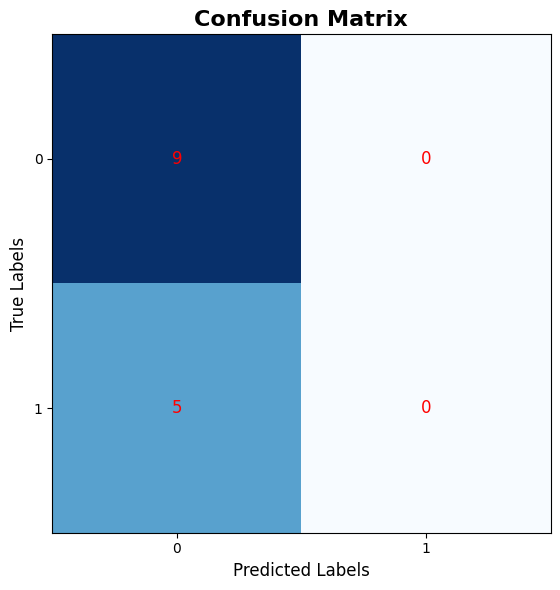

In [34]:
# retrain svm final model using train_val set and evaluate on test set
svm_final_model.fit(X_train_val, y_train_val)

y_test_pred_svm = svm_final_model.predict(X_test)

print("SVM Test: ")
print(f'Accuracy: {accuracy_score(y_test, y_test_pred_svm)}')
print(f'Precision: {precision_score(y_test, y_test_pred_svm)}')
print(f'Recall: {recall_score(y_test, y_test_pred_svm)}')
print(f'F1-Score: {fscore(y_test, y_test_pred_svm)}')
print()

display_confusion_matrix(y_test, y_test_pred_svm)

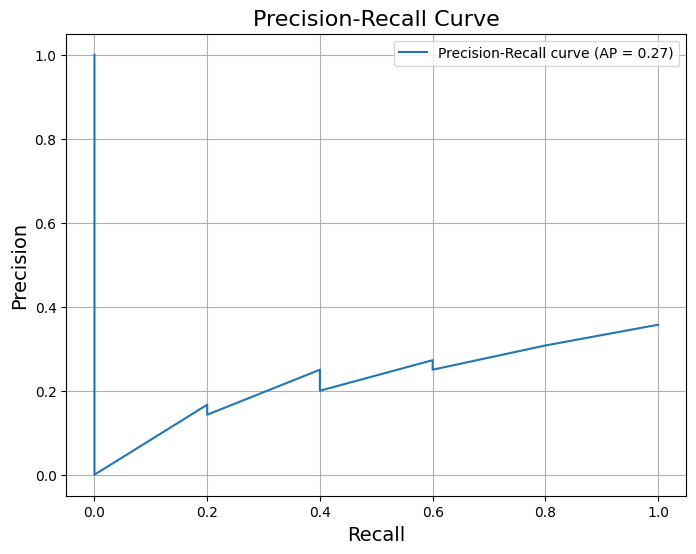

In [35]:
y_scores_svm = svm_final_model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores_svm)
average_precision = average_precision_score(y_test, y_scores_svm)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Precision', fontsize=14)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='best')
plt.grid()
plt.show()